# **Semanas 10: Aprendizado Supervisionado I**
## **Atividade Semanal**

> Esta é atividade semanal sugerida. Você deverá preenchê-la e enviá-la dentro do prazo (até o fechamento da semana corrente).

In [ ]:
# NAO ALTERE OS COMANDOS ABAIXO
import gdown
import pandas as pd

url = 'https://drive.google.com/uc?id=1DX0K5tePT6wDG1Hh0tqCq1XwE4KRsMPj'
output = 'performance_estudantes.csv'
gdown.download(url, output, quiet=True)

performance_estudantes = pd.read_csv('/content/performance_estudantes.csv')

In [ ]:
display(performance_estudantes)

,horas_estudadas,notas_anteriores,atividades_extracurriculares,horas_sono,quantidade_simulados,nota
0,7,99,S,9,1,91.0
1,4,82,N,4,2,65.0
2,8,51,S,7,2,45.0
3,5,52,S,5,2,36.0
4,7,75,N,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,S,4,2,23.0
9996,7,64,S,8,5,58.0
9997,6,83,S,8,5,74.0
9998,9,97,S,7,0,95.0


> Em uma escola privada, a equipe pedagógica tem se preocupado cada vez mais com o desempenho dos alunos nas avaliações finais. Apesar do esforço dos professores e da dedicação de muitos estudantes, os resultados têm sido bastante variados — alguns alunos alcançam notas altíssimas, enquanto outros enfrentam dificuldades mesmo após participarem de simulados e atividades escolares.
>
> Para entender melhor esse fenômeno, a coordenação pedagógica reuniu um conjunto de informações sobre os alunos, que inclui:
>
> *   Horas estudadas na semana antes da prova,
> *   Notas anteriores obtidas em avaliações passadas,
> *   Participação ou não em atividades extracurriculares (S = Sim, N = Não),
> *   Horas de sono médias por noite na semana da prova,
> *   Número de simulados realizados como preparação,
> *   E, por fim, a nota final obtida na avaliação mais recente.
>
> Você foi convidado(a) pela direção da escola para ajudar a prever a nota final dos alunos com base nesses fatores.

###Questão 1

Verifique se há registros duplicados, ausentes ou discrepantes na base. Caso positivo, remova-os.

In [1]:
# Questao 1
import seaborn as sns
import matplotlib.pyplot as plt
nova_performance_estudantes=performance_estudantes.copy() # criando uma copia da base de dados

#Verificando se há dados duplicados na base exceto na coluna de atividades_extracurriculares(pois se usarmos drop na mesma toda a coluna vai sumir)
nova_performance_estudantes.drop_duplicates(subset=['horas_estudadas', 'notas_anteriores', 'horas_sono', 'quantidade_simulados', 'nota'], keep='first', inplace=True)

#retirando dados ausentes
nova_performance_estudantes=nova_performance_estudantes.dropna()
#vendo se há valores discrepantes
nova_performance_estudantes.describe()
sns.pairplot(nova_performance_estudantes[['horas_estudadas', 'notas_anteriores', 'horas_sono', 'quantidade_simulados', 'nota']])
plt.show()

#não há dados discrepantes na base de dados


NameError: name 'performance_estudantes' is not defined

###Questão 2

Após a base limpa e organizada, realize o pré-processamento para a aplicação do modelo de Regressão Linear.

In [ ]:
# Questao 2
#Identificando os alvos e atributos
alvo='nota'
atributos=['horas_estudadas','notas_anteriores','horas_sono','quantidade_simulados','atividades_extracurriculares']

#criando as bases separadas (X,Y)
y=nova_performance_estudantes[alvo].to_frame()
X=nova_performance_estudantes[atributos]

# separando os atributos
atrib_num=['horas_estudadas','notas_anteriores','horas_sono','quantidade_simulados']
atrib_cat=['atividades_extracurriculares']

#criando bases separadas para X
X_num=nova_performance_estudantes[atrib_num] #númericas
X_cat=nova_performance_estudantes[atrib_cat] #categoricas

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.decomposition import PCA

# Pipeline para atributos numéricos
num_pipe = Pipeline([
    ('padronizacao', StandardScaler()),
    ('transformacao', PowerTransformer()),
    ('componentes', PCA())
])

# Transformacao para os atributos
atributos_transf = ColumnTransformer([
    # Transformacoes - Atributos numericos
    ('Atributos numericos', num_pipe, atrib_num),
    # Transformacoes - Atributos categoricos
    ('Atributos categoricos', OneHotEncoder(dtype='int', drop='first'), atrib_cat)],
    remainder='drop',
    verbose_feature_names_out=False
)

# Aplicando a transformacao nos atributos
atributos_transf.fit(X)

ColumnTransformer(transformers=[('Atributos numericos',
                                 Pipeline(steps=[('padronizacao',
                                                  StandardScaler()),
                                                 ('transformacao',
                                                  PowerTransformer()),
                                                 ('componentes', PCA())]),
                                 ['horas_estudadas', 'notas_anteriores',
                                  'horas_sono', 'quantidade_simulados']),
                                ('Atributos categoricos',
                                 OneHotEncoder(drop='first', dtype='int'),
                                 ['atividades_extracurriculares'])],
                  verbose_feature_names_out=False)

In [ ]:
from sklearn.linear_model import LinearRegression

# Sequenciando as transformacoes necessarias
# para um alvo numérico
alvo_num_rl = TransformedTargetRegressor(
    regressor=LinearRegression(), # Aqui entra o algoritmo para regressão (alvo numérico)
    transformer=num_pipe
)

# Pipeline
pipe_num_rl = Pipeline(steps=[
   ('atributos', atributos_transf),
   ('alvo', alvo_num_rl)])

In [ ]:
# Ativando o modelo
pipe_num_rl.fit(X, y)

Pipeline(steps=[('atributos',
                 ColumnTransformer(transformers=[('Atributos numericos',
                                                  Pipeline(steps=[('padronizacao',
                                                                   StandardScaler()),
                                                                  ('transformacao',
                                                                   PowerTransformer()),
                                                                  ('componentes',
                                                                   PCA())]),
                                                  ['horas_estudadas',
                                                   'notas_anteriores',
                                                   'horas_sono',
                                                   'quantidade_simulados']),
                                                 ('Atributos categoricos',
                                                  OneHotEncoder(drop='first',
                                                                dtype='int'),
                                                  ['atividades_extracurriculares'])],
                                   verbose_feature_names_out=False)),
                ('alvo',
                 TransformedTargetRegressor(regressor=LinearRegression(),
                                            transformer=Pipeline(steps=[('padronizacao',
                                                                         StandardScaler()),
                                                                        ('transformacao',
                                                                         PowerTransformer()),
                                                                        ('componentes',
                                                                         PCA())])))])

###Questão 3

Treine o modelo de regressão linear utilizando esses dados. Compare visualmente suas previsões.

In [ ]:
# Questao 3
# Previsao utilizando o modelo 'Regressão linear'
y_prev_rl = pipe_num_rl.predict(X)

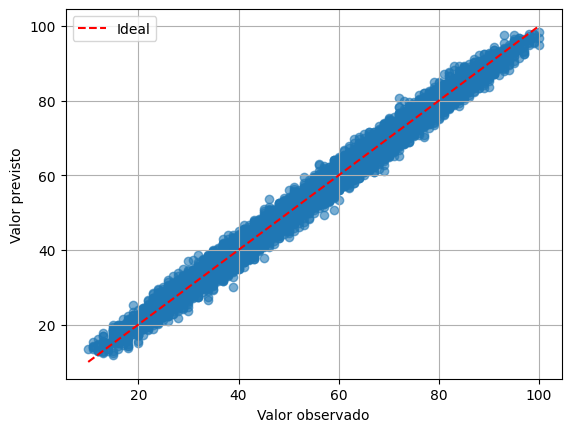

In [ ]:
# Gráfico de dispersão
import matplotlib.pyplot as plt
plt.scatter(y, y_prev_rl, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal')
plt.xlabel('Valor observado')
plt.ylabel('Valor previsto')
plt.grid(True)
plt.legend()
plt.show()

###Questão 4

Pelo histórico de dados, sabemos que um aluno mediano:
*   Estuda 5 horas
*   Tem nota anterior 69
*   Dorme 7 horas por noite
*   Realizou 5 simulados

Assim, para o planejamento pedagógico, qual impacto na nota final teriam:
*   Um aumento de 20% no tempo de estudo.
*   A realização de 1 simulado a mais.

Considerando tanto alunos com ou sem atividades extracurriculares.

> Compute o aumento percentual nas notas dos alunos com ou sem atividades extracurriculares considerando o novo cenário.

In [ ]:
# Questao 4
# Informação (atributos) de (novos) 3 imóveis
X_novo = pd.DataFrame({
    'horas_estudadas':[5,5],
    'notas_anteriores':[69,69],
    'horas_sono':[7,7],
    'quantidade_simulados':[5,5],
    'atividades_extracurriculares':['S','N']
})

# Previsao utilizando o modelo 'Regressão linear'
y_prev_rl_novo = pipe_num_rl.predict(X_novo)

In [ ]:
print('O aumento percentual nas notas dos alunos computado:')
for i, valor in enumerate(y_prev_rl_novo.flatten(), 1):
  if i==1:
    print(f" COM atividades extracurriculares considerando o novo cenário foi de {valor:,.2f}")
  else:
    print(f" SEM atividades extracurriculares considerando o novo cenário foi de {valor:,.2f}")


O aumento percentual nas notas dos alunos computado:
 COM atividades extracurriculares considerando o novo cenário foi de 55.43
 SEM atividades extracurriculares considerando o novo cenário foi de 54.80
